目的：e-statから国勢調査による滋賀県の男女別人口（20〜29歳）を抽出し、時系列による折れ線グラフを作成すること。

※e-statのapi IDは別ファイルにしてあるため、２行目はエラーになる。

# e-StatのWeb API

In [2]:
import requests
import pandas as pd
import json
import time
import io

## 統計表情報の取得

In [3]:
# 別ファイルに保存しておいたAPI tokenを読み込む
with open('e-stat_api_key.json') as f:
    api_key = json.load(f)

In [4]:
# 今回の統計表の検索に使うキーワード
searchYear='2015'
searchWord='	国勢調査'

In [5]:
# 統計表情報取得のためのEndpoint
# api_keyをappIDの値として指定
r=requests.get('http://api.e-stat.go.jp/rest/3.0/app/json/getStatsList?appId={}&searchWord={}&searchYear2020'
               .format(api_key['appId'],searchWord,searchYear))

In [6]:
stats_list=r.json()
stats_list

{'GET_STATS_LIST': {'RESULT': {'STATUS': 0,
   'ERROR_MSG': '正常に終了しました。',
   'DATE': '2021-06-09T20:48:45.313+09:00'},
  'PARAMETER': {'LANG': 'J', 'SEARCH_WORD': '\t国勢調査', 'DATA_FORMAT': 'J'},
  'DATALIST_INF': {'NUMBER': 4904,
   'RESULT_INF': {'FROM_NUMBER': 1, 'TO_NUMBER': 4904},
   'TABLE_INF': [{'@id': '0003403679',
     'STAT_NAME': {'@code': '00200521', '$': '国勢調査'},
     'GOV_ORG': {'@code': '00200', '$': '総務省'},
     'STATISTICS_NAME': '平成12年国勢調査 最終報告書日本の人口（平成12年国勢調査の主要結果）',
     'TITLE': {'@no': '1', '$': '全国の人口，人口増減，面積及び人口密度（大正9年～平成12年）'},
     'CYCLE': '-',
     'SURVEY_DATE': '200001-200012',
     'OPEN_DATE': '2020-05-22',
     'SMALL_AREA': 0,
     'COLLECT_AREA': '該当なし',
     'MAIN_CATEGORY': {'@code': '02', '$': '人口・世帯'},
     'SUB_CATEGORY': {'@code': '01', '$': '人口'},
     'OVERALL_TOTAL_NUMBER': 90,
     'UPDATED_DATE': '2020-05-23',
     'STATISTICS_NAME_SPEC': {'TABULATION_CATEGORY': '平成12年国勢調査',
      'TABULATION_SUB_CATEGORY1': '最終報告書日本の人口（平成12年国勢調査の主要結果）'},
  

In [7]:
df_stats_list=pd.json_normalize(stats_list['GET_STATS_LIST']['DATALIST_INF']['TABLE_INF'])

In [8]:
len(df_stats_list) # pandasの行数を確認

4904

In [9]:
df_stats_list.head()

,@id,STATISTICS_NAME,CYCLE,SURVEY_DATE,OPEN_DATE,SMALL_AREA,COLLECT_AREA,OVERALL_TOTAL_NUMBER,UPDATED_DATE,DESCRIPTION,...,STATISTICS_NAME_SPEC.TABULATION_CATEGORY,STATISTICS_NAME_SPEC.TABULATION_SUB_CATEGORY1,TITLE_SPEC.TABLE_NAME,TITLE_SPEC.TABLE_EXPLANATION,STATISTICS_NAME_SPEC.TABULATION_SUB_CATEGORY2,TITLE_SPEC.TABLE_SUB_CATEGORY1,TITLE_SPEC.TABLE_SUB_CATEGORY2,STATISTICS_NAME_SPEC.TABULATION_SUB_CATEGORY3,DESCRIPTION.TABULATION_CATEGORY_EXPLANATION,DESCRIPTION.TABULATION_SUB_CATEGORY_EXPLANATION1
0,0003403679,平成12年国勢調査 最終報告書日本の人口（平成12年国勢調査の主要結果）,-,200001-200012,2020-05-22,0,該当なし,90,2020-05-23,,...,平成12年国勢調査,最終報告書日本の人口（平成12年国勢調査の主要結果）,全国の人口，人口増減，面積及び人口密度（大正9年～平成12年）,"注) 1920年～1940年の面積には, 旧東京府小笠原島の南鳥島及び沖縄県島尻郡の鳥島の面...",NaN,NaN,NaN,NaN,NaN,NaN
1,0003404236,平成12年国勢調査 最終報告書日本の人口（平成12年国勢調査の主要結果）,-,200001-200012,2020-05-22,0,該当なし,2544,2020-05-23,,...,平成12年国勢調査,最終報告書日本の人口（平成12年国勢調査の主要結果）,全国の人口階級別市町村数，人口及び人口の割合（大正9年～平成12年）,注)&nbsp;東京都の特別区部は１市として計算した。1)&nbsp;1945年の市町村数に...,NaN,NaN,NaN,NaN,NaN,NaN
2,0003404240,平成12年国勢調査 最終報告書日本の人口（平成12年国勢調査の主要結果）,-,200001-200012,2020-05-22,0,該当なし,2016,2020-05-23,,...,平成12年国勢調査,最終報告書日本の人口（平成12年国勢調査の主要結果）,都道府県の人口階級別市町村数，人口及び人口の割合（平成12年）,注)&nbsp;東京都の特別区部は１市として計算した。,NaN,NaN,NaN,NaN,NaN,NaN
3,0003404265,平成12年国勢調査 最終報告書日本の人口（平成12年国勢調査の主要結果）,-,200001-200012,2020-05-22,0,該当なし,2430,2020-05-23,,...,平成12年国勢調査,最終報告書日本の人口（平成12年国勢調査の主要結果）,全国の人口集中地区人口階級別市町村数，地区数，人口及び人口の割合（昭和35年～平成12年）,1)&nbsp;東京都の特別区部は１市として計算した｡2)&nbsp;1960年及び1965...,NaN,NaN,NaN,NaN,NaN,NaN
4,0003404508,平成12年国勢調査 最終報告書日本の人口（平成12年国勢調査の主要結果）,-,200001-200012,2020-05-22,0,該当なし,2500,2020-05-23,,...,平成12年国勢調査,最終報告書日本の人口（平成12年国勢調査の主要結果）,都道府県人口の自然増加数及び社会増加数（大正9年～平成12年）,(資料)&nbsp;1920年～1930年：｢昭和５年 国勢調査最終報告書｣，内閣統計局&n...,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_stats_list.to_csv('census.csv', encoding='utf_8_sig') 

## 統計表からの統計データの取得

In [11]:
statsDataId="0003410381" #国勢調査の時系列データを読み込み

In [12]:
# 実際の統計情報取得のためのEndpoint
time.sleep(1)
r=requests.get('http://api.e-stat.go.jp/rest/3.0/app/getSimpleStatsData?appId={}&statsDataId={}&sectionHeaderFlg={}'
               .format(api_key['appId'],statsDataId,'2'))

In [13]:
df=pd.read_csv(io.StringIO(r.text))#ioを使って、全データをテキストとして読み込んでいる。
df

,tab_code,表章項目,cat01_code,総数，男及び女_時系列,cat02_code,年齢（５歳階級）再掲有り_時系列,area_code,都道府県_時系列（人口集中地区有り一部の市）,time_code,時間軸（調査年）,unit,value,annotation
0,20,人口,100,総数,100,総数,1000,北海道,1920000000,1920年,人,2359183,NaN
1,20,人口,100,総数,100,総数,1000,北海道,1925000000,1925年,人,2498679,NaN
2,20,人口,100,総数,100,総数,1000,北海道,1930000000,1930年,人,2812335,NaN
3,20,人口,100,総数,100,総数,1000,北海道,1935000000,1935年,人,3068282,NaN
4,20,人口,100,総数,100,総数,1000,北海道,1940000000,1940年,人,3272012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,24,年齢，男女別割合,110,男,310,85歳以上,18000,福井県,1995000000,1995年,%,0.5098480734,NaN
99996,24,年齢，男女別割合,110,男,310,85歳以上,18000,福井県,2000000000,2000年,%,0.6546800877,NaN
99997,24,年齢，男女別割合,110,男,310,85歳以上,18000,福井県,2005000000,2005年,%,0.7994108064,NaN
99998,24,年齢，男女別割合,110,男,310,85歳以上,18000,福井県,2010000000,2010年,%,1.0524167139,NaN


In [14]:
print(type(df))
df.to_csv('df.csv', encoding='utf_8_sig') 

<class 'pandas.core.frame.DataFrame'>


In [15]:
from collections import Counter
print(Counter(df['表章項目']))

Counter({'人口': 62040, '年齢，男女別割合': 37960})


In [16]:
print(Counter(df['都道府県_時系列（人口集中地区有り一部の市）']))

Counter({'北海道': 2140, '青森県': 2140, '岩手県': 2140, '宮城県': 2140, '秋田県': 2140, '山形県': 2140, '福島県': 2140, '茨城県': 2140, '栃木県': 2140, '群馬県': 2140, '埼玉県': 2140, '千葉県': 2140, '東京都': 2140, '神奈川県': 2140, '新潟県': 2140, '富山県': 2140, '石川県': 2140, '福井県': 2140, '山梨県': 2120, '長野県': 2120, '岐阜県': 2120, '静岡県': 2120, '愛知県': 2120, '三重県': 2120, '滋賀県': 2120, '京都府': 2120, '大阪府': 2120, '兵庫県': 2120, '奈良県': 2120, '和歌山県': 2120, '鳥取県': 2120, '島根県': 2120, '岡山県': 2120, '広島県': 2120, '山口県': 2120, '徳島県': 2120, '香川県': 2120, '愛媛県': 2120, '高知県': 2120, '福岡県': 2120, '佐賀県': 2120, '長崎県': 2120, '熊本県': 2120, '大分県': 2120, '宮崎県': 2120, '鹿児島県': 2120, '沖縄県': 2120})


In [17]:
print(Counter(df['年齢（５歳階級）再掲有り_時系列']))

Counter({'総数': 4700, '０～４歳': 4700, '５～９歳': 4700, '10～14歳': 4700, '15～19歳': 4700, '20～24歳': 4700, '25～29歳': 4700, '30～34歳': 4700, '35～39歳': 4700, '40～44歳': 4700, '45～49歳': 4700, '50～54歳': 4700, '55～59歳': 4700, '60～64歳': 4700, '65～69歳': 4700, '70～74歳': 4700, '75～79歳': 4700, '80～84歳': 4700, '85歳以上': 4120, '（再掲）15歳未満': 3760, '（再掲）15～64歳': 3760, '（再掲）65歳以上': 3760})


## 5歳階級別の人口を加工し、20〜29歳人口とする（なお、時系列は1980〜2015年とする）。
https://qiita.com/propella/items/a9a32b878c77222630ae

In [18]:
df_20s=df[df['年齢（５歳階級）再掲有り_時系列'].isin(['総数','20～24歳','25～29歳'])]

In [19]:
df_20s.shape

(14100, 13)

In [20]:
df_20s.head()

,tab_code,表章項目,cat01_code,総数，男及び女_時系列,cat02_code,年齢（５歳階級）再掲有り_時系列,area_code,都道府県_時系列（人口集中地区有り一部の市）,time_code,時間軸（調査年）,unit,value,annotation
0,20,人口,100,総数,100,総数,1000,北海道,1920000000,1920年,人,2359183,NaN
1,20,人口,100,総数,100,総数,1000,北海道,1925000000,1925年,人,2498679,NaN
2,20,人口,100,総数,100,総数,1000,北海道,1930000000,1930年,人,2812335,NaN
3,20,人口,100,総数,100,総数,1000,北海道,1935000000,1935年,人,3068282,NaN
4,20,人口,100,総数,100,総数,1000,北海道,1940000000,1940年,人,3272012,NaN


In [21]:
df_20s.to_csv('df_20s.csv', encoding='utf_8_sig') 

In [22]:
df_20s_1980=df_20s[df_20s['時間軸（調査年）'].isin(['1980年','1985年','1990年','1995年','2000年','2005年','2010年','2015年'])]

In [23]:
df_20s_1980.shape

(5640, 13)

In [24]:
df_20s_1980.head()

,tab_code,表章項目,cat01_code,総数，男及び女_時系列,cat02_code,年齢（５歳階級）再掲有り_時系列,area_code,都道府県_時系列（人口集中地区有り一部の市）,time_code,時間軸（調査年）,unit,value,annotation
12,20,人口,100,総数,100,総数,1000,北海道,1980000000,1980年,人,5575989,NaN
13,20,人口,100,総数,100,総数,1000,北海道,1985000000,1985年,人,5679439,NaN
14,20,人口,100,総数,100,総数,1000,北海道,1990000000,1990年,人,5643647,NaN
15,20,人口,100,総数,100,総数,1000,北海道,1995000000,1995年,人,5692321,NaN
16,20,人口,100,総数,100,総数,1000,北海道,2000000000,2000年,人,5683062,NaN


In [25]:
df_20s_1980.dtypes

tab_code                    int64
表章項目                       object
cat01_code                  int64
総数，男及び女_時系列                object
cat02_code                  int64
年齢（５歳階級）再掲有り_時系列           object
area_code                   int64
都道府県_時系列（人口集中地区有り一部の市）     object
time_code                   int64
時間軸（調査年）                   object
unit                       object
value                      object
annotation                float64
dtype: object

In [26]:
df_20s_1980 = df_20s_1980.astype({"value":'float'})

In [27]:
df_20s_1980.head()

,tab_code,表章項目,cat01_code,総数，男及び女_時系列,cat02_code,年齢（５歳階級）再掲有り_時系列,area_code,都道府県_時系列（人口集中地区有り一部の市）,time_code,時間軸（調査年）,unit,value,annotation
12,20,人口,100,総数,100,総数,1000,北海道,1980000000,1980年,人,5575989.0,NaN
13,20,人口,100,総数,100,総数,1000,北海道,1985000000,1985年,人,5679439.0,NaN
14,20,人口,100,総数,100,総数,1000,北海道,1990000000,1990年,人,5643647.0,NaN
15,20,人口,100,総数,100,総数,1000,北海道,1995000000,1995年,人,5692321.0,NaN
16,20,人口,100,総数,100,総数,1000,北海道,2000000000,2000年,人,5683062.0,NaN


In [28]:
df_20sum =df_20s_1980 [df_20s_1980 ["年齢（５歳階級）再掲有り_時系列"].isin(['20～24歳', '25～29歳'])].groupby(['総数，男及び女_時系列', '年齢（５歳階級）再掲有り_時系列','都道府県_時系列（人口集中地区有り一部の市）','時間軸（調査年）','unit']).sum()

In [29]:
df_20sum =df_20sum.groupby(['総数，男及び女_時系列', '都道府県_時系列（人口集中地区有り一部の市）','時間軸（調査年）','unit']).sum()
df_20sum['年齢（５歳階級）再掲有り_時系列'] = '20～29歳'

In [30]:
df_20sum = df_20sum.reset_index()

In [31]:
df_20sum.shape

(1880, 12)

In [32]:
df_20sum = df_20sum.iloc[:,[0,11,1,2,3,4,5,6,7,8,9,10]]

In [33]:
df_20sum.head()

,総数，男及び女_時系列,年齢（５歳階級）再掲有り_時系列,都道府県_時系列（人口集中地区有り一部の市）,時間軸（調査年）,unit,tab_code,cat01_code,cat02_code,area_code,time_code,value,annotation
0,女,20～29歳,三重県,1980年,人,40,240,330,48000,3960000000,110455.0,0.0
1,女,20～29歳,三重県,1985年,人,40,240,330,48000,3970000000,106455.0,0.0
2,女,20～29歳,三重県,1990年,人,40,240,330,48000,3980000000,111981.0,0.0
3,女,20～29歳,三重県,1995年,人,40,240,330,48000,3990000000,124497.0,0.0
4,女,20～29歳,三重県,2000年,人,40,240,330,48000,4000000000,120686.0,0.0


In [34]:
df_20sum.to_csv('df_20sum.csv', encoding='utf_8_sig') 

In [35]:
df_all =df_20s_1980 [df_20s_1980 ["年齢（５歳階級）再掲有り_時系列"]=='総数'].groupby(['総数，男及び女_時系列', '年齢（５歳階級）再掲有り_時系列','都道府県_時系列（人口集中地区有り一部の市）','時間軸（調査年）','unit']).sum()

In [36]:
df_all.head()

tab_code  \
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit             
女           総数               三重県                    1980年    人           20   
                                                    1985年    人           20   
                                                    1990年    人           20   
                                                    1995年    人           20   
                                                    2000年    人           20   

                                                                   cat01_code  \
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit               
女           総数               三重県                    1980年    人            120   
                                                    1985年    人            120   
                                                    1990年    人            120   
                                                    1995年    人            120   
                                                    2000年    人            120   

                                                                   cat02_code  \
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit               
女           総数               三重県                    1980年    人            100   
                                                    1985年    人            100   
                                                    1990年    人            100   
                                                    1995年    人            100   
                                                    2000年    人            100   

                                                                   area_code  \
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit              
女           総数               三重県                    1980年    人         24000   
                                                    1985年    人         24000   
                                                    1990年    人         24000   
                                                    1995年    人         24000   
                                                    2000年    人         24000   

                                                                    time_code  \
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit               
女           総数               三重県                    1980年    人     1980000000   
                                                    1985年    人     1985000000   
                                                    1990年    人     1990000000   
                                                    1995年    人     1995000000   
                                                    2000年    人     2000000000   

                                                                      value  \
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit             
女           総数               三重県                    1980年    人     869358.0   
                                                    1985年    人     899891.0   
                                                    1990年    人     922999.0   
                                                    1995年    人     947376.0   
                                                    2000年    人     955959.0   

                                                                   annotation  
総数，男及び女_時系列 年齢（５歳階級）再掲有り_時系列 都道府県_時系列（人口集中地区有り一部の市） 時間軸（調査年） unit              
女           総数               三重県                    1980年    人            0.0  
                                                    1985年    人            0.0  
                                                    1990年    人            0.0  
                                                    1995年    人            0.0  
                                                    2000年    人            0.0

In [37]:
df_all = df_all.reset_index()

In [38]:
df_concat = pd.concat([df_20sum, df_all])

In [39]:
df_concat.head()

,総数，男及び女_時系列,年齢（５歳階級）再掲有り_時系列,都道府県_時系列（人口集中地区有り一部の市）,時間軸（調査年）,unit,tab_code,cat01_code,cat02_code,area_code,time_code,value,annotation
0,女,20～29歳,三重県,1980年,人,40,240,330,48000,3960000000,110455.0,0.0
1,女,20～29歳,三重県,1985年,人,40,240,330,48000,3970000000,106455.0,0.0
2,女,20～29歳,三重県,1990年,人,40,240,330,48000,3980000000,111981.0,0.0
3,女,20～29歳,三重県,1995年,人,40,240,330,48000,3990000000,124497.0,0.0
4,女,20～29歳,三重県,2000年,人,40,240,330,48000,4000000000,120686.0,0.0


In [122]:
df_concat_r = df_concat.drop(df_concat.columns[[5,6,7,8,9,11]], axis=1)

In [123]:
df_concat_r.shape

(3760, 6)

In [124]:
df_concat_r = df_concat_r.set_axis(['sex', 'age', 'pref','year', 'unit','value'], axis=1)

In [125]:
df_concat_r.dtypes

sex       object
age       object
pref      object
year      object
unit      object
value    float64
dtype: object

In [126]:
df_concat_r['year'] = pd.to_datetime(df_concat_r['year'], format='%Y年')
df_concat_r['year'] = df_concat_r['year'].dt.year

In [127]:
df_concat_r.set_index(['year'])

,sex,age,pref,unit,value
year,,,,,
1980,女,20～29歳,三重県,人,110455.0
1985,女,20～29歳,三重県,人,106455.0
1990,女,20～29歳,三重県,人,111981.0
1995,女,20～29歳,三重県,人,124497.0
2000,女,20～29歳,三重県,人,120686.0
...,...,...,...,...,...
2005,総数,総数,鹿児島県,人,1753179.0
2010,総数,総数,鹿児島県,%,100.0
2010,総数,総数,鹿児島県,人,1706242.0


In [128]:
df_concat_r.to_csv('df_concat_r.csv', encoding='utf_8_sig') 

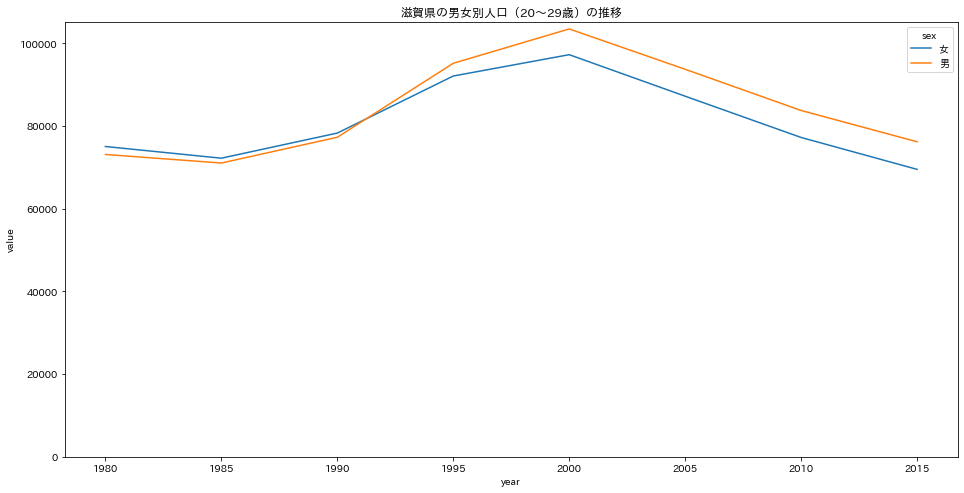

In [129]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

plt.figure(figsize=(16, 8))
ax = sns.lineplot(x="year", y="value", data=df_concat_r [(df_concat_r ["unit"]=="人") & (df_concat_r ["sex"]!="総数")& (df_concat_r ["pref"]=="滋賀県")& (df_concat_r ["age"]!="総数")],hue="sex").set(yscale='linear', ylim=(0, None))
ax = plt.title('滋賀県の男女別人口（20〜29歳）の推移')

### 1990年〜1995年を境に、20〜29歳の人口は男性が女性を上回り、その傾向が続いている。
###  →20〜29歳の人口推移について、各都道府県の類似度を確認したい。

## 20-29歳の女性のみのデータにする

https://www.delftstack.com/ja/howto/python-pandas/how-to-delete-dataframe-row-in-pandas-based-on-column-value/

In [130]:
indexNames = df_concat_r[df_concat_r['sex']!='女'].index

In [131]:
indexNames

Int64Index([ 376,  377,  378,  379,  380,  381,  382,  383,  384,  385,
            ...
            1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879],
           dtype='int64', length=3008)

In [136]:
df_concat_r.shape

(752, 6)

In [133]:
df_clust =df_concat_r.drop(df_concat_r.index[indexNames], inplace=True)

In [150]:
df_concat_r.head()

,sex,age,pref,year,unit,value
0,女,20～29歳,三重県,1980,人,110455.0
1,女,20～29歳,三重県,1985,人,106455.0
2,女,20～29歳,三重県,1990,人,111981.0
3,女,20～29歳,三重県,1995,人,124497.0
4,女,20～29歳,三重県,2000,人,120686.0


In [156]:
df_concat_r= df_concat_r[df_concat_r.age != "総数"]

In [157]:
df_concat_r.to_csv('df_concat_r.csv', encoding='utf_8_sig') 

In [158]:
df_clust = df_concat_r.drop(df_concat_r.columns[[0,1,4]], axis=1)

In [159]:
df_clust.set_index(['year'])

,pref,value
year,,
1980,三重県,110455.0
1985,三重県,106455.0
1990,三重県,111981.0
1995,三重県,124497.0
2000,三重県,120686.0
...,...,...
1995,鹿児島県,99987.0
2000,鹿児島県,103563.0
2005,鹿児島県,97693.0


https://note.nkmk.me/python-pandas-stack-unstack-pivot/

In [172]:
df_table = df_clust.pivot_table(index='year', columns='pref', values='value')

In [183]:
df_table.head()

pref,三重県,京都府,佐賀県,兵庫県,北海道,千葉県,和歌山県,埼玉県,大分県,大阪府,...,群馬県,茨城県,長崎県,長野県,青森県,静岡県,香川県,高知県,鳥取県,鹿児島県
year,,,,,,,,,,,,,,,,,,,,,
1980,110455.0,181690.0,63091.0,363047.0,428360.0,325380.0,69382.0,370959.0,84114.0,617911.0,...,125175.0,179177.0,113292.0,128700.0,112812.0,240473.0,65900.0,52448.0,39806.0,123042.0
1985,106455.0,174997.0,56688.0,347187.0,384082.0,317807.0,64694.0,362643.0,74961.0,608411.0,...,113970.0,165248.0,99184.0,121054.0,98641.0,222722.0,59462.0,47298.0,35719.0,112671.0
1990,111981.0,187834.0,52356.0,375408.0,374282.0,383708.0,64548.0,462374.0,69072.0,679827.0,...,119709.0,173620.0,89758.0,123119.0,86266.0,231408.0,58317.0,43445.0,32192.0,99735.0
1995,124497.0,213298.0,53969.0,408465.0,394739.0,457090.0,68116.0,558015.0,72641.0,758400.0,...,135222.0,201544.0,90521.0,135147.0,87290.0,254177.0,65468.0,46260.0,33382.0,99987.0
2000,120686.0,209293.0,53578.0,405454.0,380562.0,439357.0,63922.0,530857.0,72890.0,701512.0,...,131735.0,200122.0,87328.0,134592.0,85482.0,243279.0,65570.0,47265.0,35289.0,103563.0


In [175]:
df_table.to_csv('df_table.csv', encoding='utf_8_sig') 

In [184]:
d_col = df_table.columns
d_ind = df_table.index

In [186]:
d_ind[:5]

Int64Index([1980, 1985, 1990, 1995, 2000], dtype='int64', name='year')

## 正規化（0〜1）を行う
https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/

In [178]:
from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()

df_nor = mm.fit_transform(df_table)
df_nor = pd.DataFrame(df_nor)

In [179]:
df_nor.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.679991,0.574727,1.000000,0.693976,1.000000,0.184963,1.000000,0.045784,1.000000,0.530360,...,0.802326,0.698716,1.000000,0.879197,1.000000,0.858919,1.000000,1.000000,1.000000,1.000000
1,0.588833,0.484675,0.746546,0.587112,0.763901,0.138100,0.841096,0.003362,0.741002,0.498603,...,0.581868,0.511093,0.747386,0.735928,0.771627,0.676176,0.759785,0.794894,0.748384,0.805510
2,0.714768,0.657392,0.575070,0.777263,0.711646,0.545903,0.836147,0.512113,0.574363,0.737339,...,0.694782,0.623863,0.578606,0.774621,0.572198,0.765597,0.717063,0.641443,0.531244,0.562917
3,1.000000,1.000000,0.638919,1.000000,0.820726,1.000000,0.957088,1.000000,0.675354,1.000000,...,1.000000,1.000000,0.592268,1.000000,0.588700,1.000000,0.983881,0.753555,0.604507,0.567643
4,0.913149,0.946114,0.623441,0.979712,0.745132,0.890266,0.814928,0.861461,0.682400,0.809829,...,0.931393,0.980846,0.535095,0.989601,0.559563,0.887807,0.987687,0.793580,0.721911,0.634705


In [189]:
df_nor.index = d_ind
df_nor.columns = d_col

In [190]:
df_nor.head()

pref,三重県,京都府,佐賀県,兵庫県,北海道,千葉県,和歌山県,埼玉県,大分県,大阪府,...,群馬県,茨城県,長崎県,長野県,青森県,静岡県,香川県,高知県,鳥取県,鹿児島県
year,,,,,,,,,,,,,,,,,,,,,
1980,0.679991,0.574727,1.000000,0.693976,1.000000,0.184963,1.000000,0.045784,1.000000,0.530360,...,0.802326,0.698716,1.000000,0.879197,1.000000,0.858919,1.000000,1.000000,1.000000,1.000000
1985,0.588833,0.484675,0.746546,0.587112,0.763901,0.138100,0.841096,0.003362,0.741002,0.498603,...,0.581868,0.511093,0.747386,0.735928,0.771627,0.676176,0.759785,0.794894,0.748384,0.805510
1990,0.714768,0.657392,0.575070,0.777263,0.711646,0.545903,0.836147,0.512113,0.574363,0.737339,...,0.694782,0.623863,0.578606,0.774621,0.572198,0.765597,0.717063,0.641443,0.531244,0.562917
1995,1.000000,1.000000,0.638919,1.000000,0.820726,1.000000,0.957088,1.000000,0.675354,1.000000,...,1.000000,1.000000,0.592268,1.000000,0.588700,1.000000,0.983881,0.753555,0.604507,0.567643
2000,0.913149,0.946114,0.623441,0.979712,0.745132,0.890266,0.814928,0.861461,0.682400,0.809829,...,0.931393,0.980846,0.535095,0.989601,0.559563,0.887807,0.987687,0.793580,0.721911,0.634705


## 動的時間短縮法(DTW)による比較
https://irukanobox.blogspot.com/2020/07/dtw.html

In [208]:
from itertools import combinations
 
from fastdtw import fastdtw
from tslearn.metrics import dtw
 
# 日本語フォントの指定
#plt.rcParams['font.family'] = 'TakaoGothic'
 
DT_FROM = 1980
DT_TO = 2015
 
def calc_dtw(l_sr):
    dict_dtw = {}
    for sr1, sr2 in combinations(l_sr, 2):
        distance, path = fastdtw(sr1.to_numpy(), sr2.to_numpy())
        dict_dtw[(sr1.name, sr2.name)] = (dtw(sr1.to_numpy(), sr2.to_numpy()), distance)
     
    return dict_dtw
 
#df = _load('000643758.csv')
 
# Seriesのリスト
l_sr = [item for l, item in df_nor.items()]
 
# 都道府県間のDTWを計算
dict_dtw = calc_dtw(l_sr)
 
print('\n似ている都道府県トップ10（DTW）')
display(sorted(dict_dtw.items(), key=lambda x:x[1][0])[:10])
print('\n似ている都道府県トップ10（fastDTW）')
display(sorted(dict_dtw.items(), key=lambda x:x[1][1])[:10])
print('\n似ていない都道府県トップ10（DTW）')
display(sorted(dict_dtw.items(), key=lambda x:x[1][0], reverse=True)[:10])
print('\n似ていない都道府県トップ10（fastDTW）')
display(sorted(dict_dtw.items(), key=lambda x:x[1][1], reverse=True)[:10])


似ている都道府県トップ10（DTW）


[(('佐賀県', '熊本県'), (0.040475207927344374, 0.06323773898586937)),
 (('長崎県', '青森県'), (0.047427466872497465, 0.09123798355239587)),
 (('佐賀県', '岩手県'), (0.05026118302208968, 0.10453866072596174)),
 (('宮崎県', '山形県'), (0.051113599714083524, 0.10538690186130495)),
 (('岩手県', '熊本県'), (0.054069881490279234, 0.11859479753550417)),
 (('徳島県', '高知県'), (0.055655432465486175, 0.1124596594464573)),
 (('北海道', '愛媛県'), (0.05838866356224833, 0.1328591958889438)),
 (('大分県', '福島県'), (0.06076138070259682, 0.138417327750743)),
 (('広島県', '石川県'), (0.06211199938297743, 0.12518845094429043)),
 (('北海道', '山口県'), (0.06823188485504336, 0.1344810847095883))]


似ている都道府県トップ10（fastDTW）


[(('佐賀県', '熊本県'), (0.040475207927344374, 0.06323773898586937)),
 (('長崎県', '青森県'), (0.047427466872497465, 0.09123798355239587)),
 (('佐賀県', '岩手県'), (0.05026118302208968, 0.10453866072596174)),
 (('宮崎県', '山形県'), (0.051113599714083524, 0.10538690186130495)),
 (('徳島県', '高知県'), (0.055655432465486175, 0.1124596594464573)),
 (('岩手県', '熊本県'), (0.054069881490279234, 0.11859479753550417)),
 (('広島県', '石川県'), (0.06211199938297743, 0.12518845094429043)),
 (('佐賀県', '大分県'), (0.07254884534079835, 0.12860195631599014)),
 (('北海道', '愛媛県'), (0.05838866356224833, 0.1328591958889438)),
 (('北海道', '山口県'), (0.06823188485504336, 0.1344810847095883))]


似ていない都道府県トップ10（DTW）


[(('埼玉県', '鹿児島県'), (1.334797831978654, 2.7273156368930564)),
 (('埼玉県', '福井県'), (1.3257062728055684, 2.458692267213513)),
 (('埼玉県', '青森県'), (1.3179502080532428, 2.502862346356332)),
 (('埼玉県', '熊本県'), (1.3125138954089852, 2.564935114381475)),
 (('和歌山県', '埼玉県'), (1.31234204724079, 2.2389588840198162)),
 (('埼玉県', '長崎県'), (1.304414037767571, 2.5250894111461744)),
 (('埼玉県', '山形県'), (1.2929111724957114, 2.5214602369442476)),
 (('埼玉県', '宮崎県'), (1.2924045581344155, 2.5254927866698145)),
 (('佐賀県', '埼玉県'), (1.290554673018298, 2.5113142063341334)),
 (('埼玉県', '岩手県'), (1.285731351995885, 2.458970533240894))]


似ていない都道府県トップ10（fastDTW）


[(('滋賀県', '秋田県'), (1.1744959674577324, 2.772821509045192)),
 (('埼玉県', '鹿児島県'), (1.334797831978654, 2.7273156368930564)),
 (('山形県', '滋賀県'), (1.1648365399159628, 2.639761190914891)),
 (('滋賀県', '青森県'), (1.1820587492456474, 2.627685756169073)),
 (('滋賀県', '長崎県'), (1.1642128470468378, 2.6112104008306014)),
 (('埼玉県', '秋田県'), (1.2787425039049976, 2.583904441554632)),
 (('埼玉県', '熊本県'), (1.3125138954089852, 2.564935114381475)),
 (('和歌山県', '滋賀県'), (1.2372907902325803, 2.5616471557427523)),
 (('宮崎県', '滋賀県'), (1.1563597350901365, 2.534534554065451)),
 (('滋賀県', '熊本県'), (1.1732068003310097, 2.533117971046833))]

各都道府県の女性人口（20〜29歳）の推移


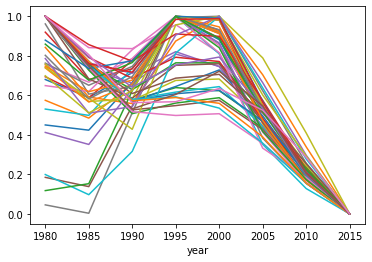

In [209]:
print('各都道府県の女性人口（20〜29歳）の推移')
ax = df_nor.plot(legend=None)
plt.show()

最も似ていないとされる滋賀県と秋田県の女性人口（20〜29歳）の推移


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 28363 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 36032 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 30476 missing from curre

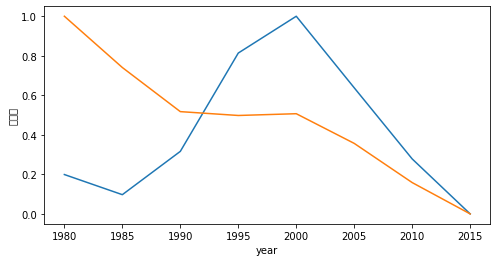

In [215]:
print('最も似ていないとされる滋賀県と秋田県の女性人口（20〜29歳）の推移')
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x="year", y="滋賀県",data = df_nor).set(label='shiga')
ax = sns.lineplot(x="year", y="秋田県",data = df_nor).set(label='akita')

## 考察
・1980年から2015年における20〜29歳の女性人口は、全ての都道府県において2015年が最も少なかった。

・ただし、推移は都道府県により違っており、１９８０年から一貫して減り続けている都道府県もあれば、2００0年まで増加した後に減少に転じている都道府県もある。それらを絶対数で比較すれば、１９８０年から一貫して減り続けている都道府県よりも、増加が後年まで続く都道府県の方が比較的女性の人口は維持されている。

・滋賀県は20〜29歳女性人口のピークが2000年であり、比較的維持されている都道府県である。大阪府や京都府、愛知県など比較的大都市に近いベッドタウンで、交通の要衝でもあり、製造業も集積していることが若年女性人口の維持につながっているのかもしれない。